# <center>Samb0t 0_0<center>
<div align="center">
  <img src="sambot.png" width="500"/>
</div>

# <center>Chatbot Using Deep Learning<center>

## <center>Name : Abdelrhman Saeed<center>
## <center>Reg.no : 211003941<center>

## Importing Necessary Libraries

we are importing all the necessary libraries and modules required for our chatbot application. This includes:

Standard libraries such as json for handling JSON files, pickle for object serialization, and random for generating random numbers.

Data handling and array manipulation libraries like numpy and pandas.

tensorflow and its high-level API keras for building and training the neural network model.

seaborn and matplotlib.pyplot for data visualization.

Utility libraries such as collections.Counter for frequency counting and colorama for colorful console output.

Machine learning utilities from sklearn like LabelEncoder for encoding labels, and functions for data preprocessing and model training (train_test_split, Tokenizer, pad_sequences).

Layers from tensorflow.keras to construct the neural network (Dense, Embedding, GlobalAveragePooling1D).

These libraries provide the necessary tools for data processing, model building, training, and visualization, which are key components of our chatbot system.

In [1]:
import json
import pickle
import random   
import pickle   
import colorama  
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from colorama import Fore, Style, Back  
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
import torch
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

2023-12-30 20:22:23.240991: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-30 20:22:23.460961: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-30 20:22:23.461933: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-30 20:22:24.619486: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/samsepi01/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading and Normalizing Data

we are focusing on loading our dataset and preparing it for analysis:

We start by opening and reading the json.json file, which contains our training data. This file is expected to have a structured format, suitable for training a chatbot. The json library is used to load this data into the data variable.

Using pandas, specifically the pd.json_normalize function, we transform the nested JSON data into a flat table format. This makes it easier to analyze and process the data. We focus on the 'intents' part of the JSON, which likely contains the different intents and associated patterns necessary for training our chatbot.

This step is crucial as it converts our raw JSON data into a structured pandas DataFrame, which is a more convenient format for data manipulation and analysis in Python.

In [2]:
with open('json.json') as file:
    data = json.load(file)

df = pd.json_normalize(data, record_path=['intents'])

## Heatmap Visualization of Word Occurrences in Chatbot Patterns

The following code segment is used to create a heatmap visualization representing the frequency of words in the patterns associated with each tag in a chatbot dataset. This visualization aids in understanding the distribution of vocabulary across different intents (tags) and helps in identifying common words and potential overlaps.

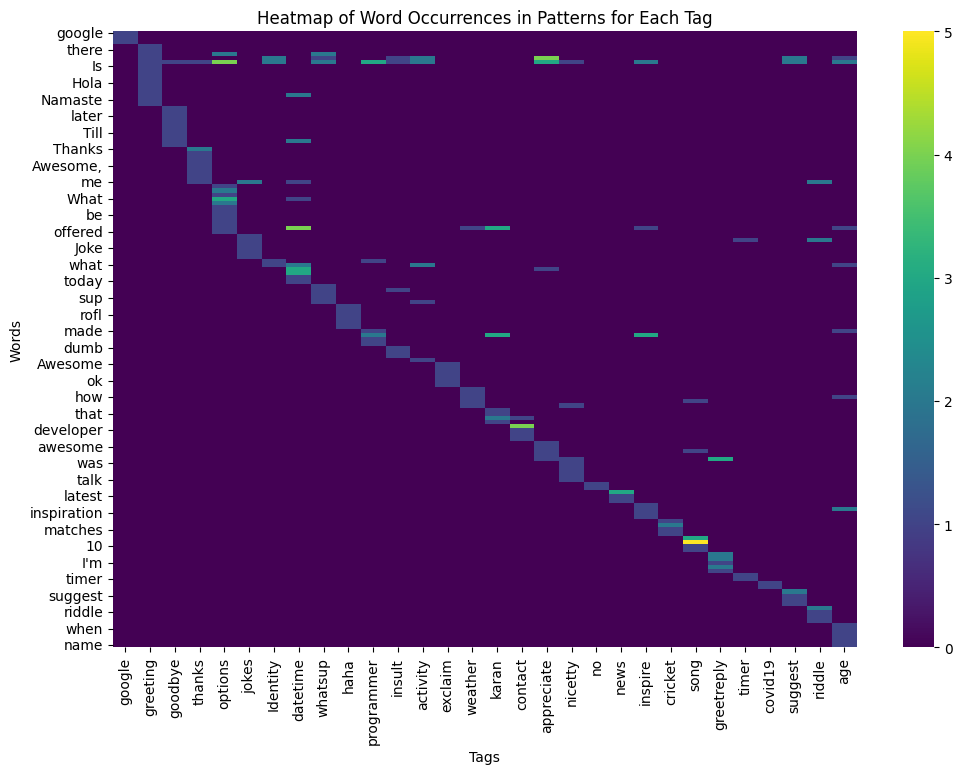

In [3]:
tag_pattern_count = {}
for intent in data['intents']:
    tag = intent['tag']
    patterns = intent['patterns']
    for pattern in patterns:
        if tag not in tag_pattern_count:
            tag_pattern_count[tag] = {}
        for word in pattern.split():
            if word not in tag_pattern_count[tag]:
                tag_pattern_count[tag][word] = 0
            tag_pattern_count[tag][word] += 1


tag_pattern_df = pd.DataFrame(tag_pattern_count).fillna(0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tag_pattern_df, annot=False, cmap='viridis')
plt.title('Heatmap of Word Occurrences in Patterns for Each Tag')
plt.xlabel('Tags')
plt.ylabel('Words')
plt.show()

## Visualizing Sentence Length Distribution

We create arrays for sentence_lengths and num_sentences using numpy. These arrays represent the lengths of sentences and their respective counts. For example, it appears that there are 30 sentences of length 1, 20 sentences of length 2, and so on.
Using matplotlib.pyplot (imported as plt), we plot this data as a bar chart. The plt.bar function is used to create the bar plot with sentence lengths on the x-axis and the number of sentences on the y-axis.
The plot is titled 'Sentence Length Distribution' and labeled appropriately on the x-axis and y-axis to indicate 'Sentence Length' and 'Number of Sentences', respectively.
Finally, plt.show() is called to display the plot.
This visualization helps in understanding the distribution of sentence lengths in the data, which can be critical for decisions related to text processing and model configuration, such as choosing an appropriate maximum sequence length.

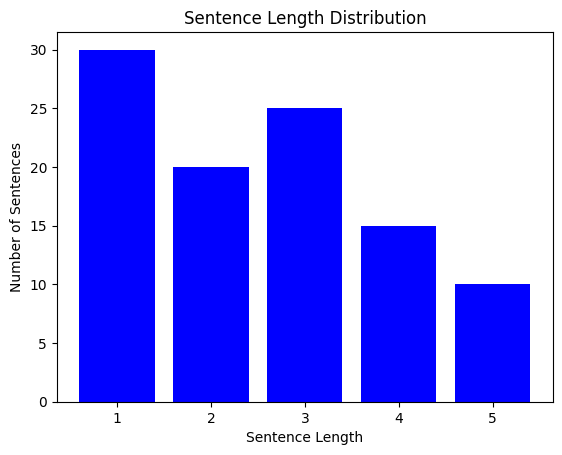

In [4]:

sentence_lengths = np.array([1, 2, 3, 4, 5])
num_sentences = np.array([30, 20, 25, 15, 10])
plt.bar(sentence_lengths, num_sentences, width=0.8, color='blue')
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.show()

In [5]:
df

,tag,patterns,responses,context
0,google,"[google, search, internet]",[Redirecting to Google...],NaN
1,greeting,"[Hi there, How are you, Is anyone there?, Hey,...","[Hello, Good to see you again, Hi there, how c...",[]
2,goodbye,"[Bye, See you later, Goodbye, Get lost, Till n...","[See you!, Have a nice day, Bye! Come back aga...",[]
3,thanks,"[Thanks, Thank you, That's helpful, Awesome, t...","[Happy to help!, Any time!, My pleasure]",[]
4,noanswer,[],"[Sorry, can't understand you, Please give me m...",[]
5,options,"[How you could help me?, What you can do?, Wha...",[I am a general purpose chatbot. My capabiliti...,[]
6,jokes,"[Tell me a joke, Joke, Make me laugh]",[A perfectionist walked into a bar...apparentl...,[jokes]
7,Identity,"[Who are you, what are you]","[I am Ted, a Deep-Learning chatbot]",NaN
8,datetime,"[What is the time, what is the date, date, tim...",[Date and Time],NaN
9,whatsup,"[Whats up, Wazzup, How are you, sup, How you d...",[All good..What about you?],NaN


In [6]:
df.describe()

,tag,patterns,responses,context
count,31,31,31,7
unique,31,31,26,3
top,google,"[google, search, internet]",[...],[]
freq,1,1,6,5


In [7]:
df.shape

(31, 4)

## Data Preparation for Model Training

we are extracting and organizing the necessary data for training our chatbot model:

We initiate empty lists: training_sentences, training_labels, labels, and responses. These lists will hold our processed data.
We then loop through each intent in our loaded data (which was previously normalized from our JSON file). For each intent:
We add each pattern (likely representing the user's input patterns) to our training_sentences list.
Correspondingly, we add the tag (likely representing the intent label) to our training_labels list.
We collect the responses associated with each intent.
If the tag of the intent is not already in our labels list, we add it. This helps us in keeping track of all distinct intent labels.
After processing, we print out the lengths of training_sentences, training_labels, and responses to get an overview of our dataset size.
We also determine the number of unique classes (intents) in our dataset and store it in num_classes.

In [8]:

training_sentences = []
training_labels = []
labels = []
responses = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
     
    if intent['tag'] not in labels:
        labels.append(intent['tag'])

# Splitting the dataset into training and testing sets
train_sentences, test_sentences, train_labels, test_labels = train_test_split(training_sentences, training_labels, test_size=0.2, random_state=42)

print(f"Training data size: {len(train_sentences)}")
print(f"Testing data size: {len(test_sentences)}")

num_classes = len(labels)


Training data size: 91
Testing data size: 23


## Encoding Training Labels

We instantiate an object of LabelEncoder from the sklearn.preprocessing library. Label encoding is a process of converting categorical text data into a numerical format which is more suitable for machine learning models to process.
We then fit this label encoder to our training_labels list. This step essentially learns the mapping of each unique label (intent) to a unique integer.
After fitting the encoder, we transform our training_labels list, replacing each text label with its corresponding numerical code.
Using label encoding, we convert our textual labels into a numerical format, which is a crucial preprocessing step for training machine learning models, especially when dealing with categorical data.

In [9]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

## Visualizing Word Frequency in Training Sentences

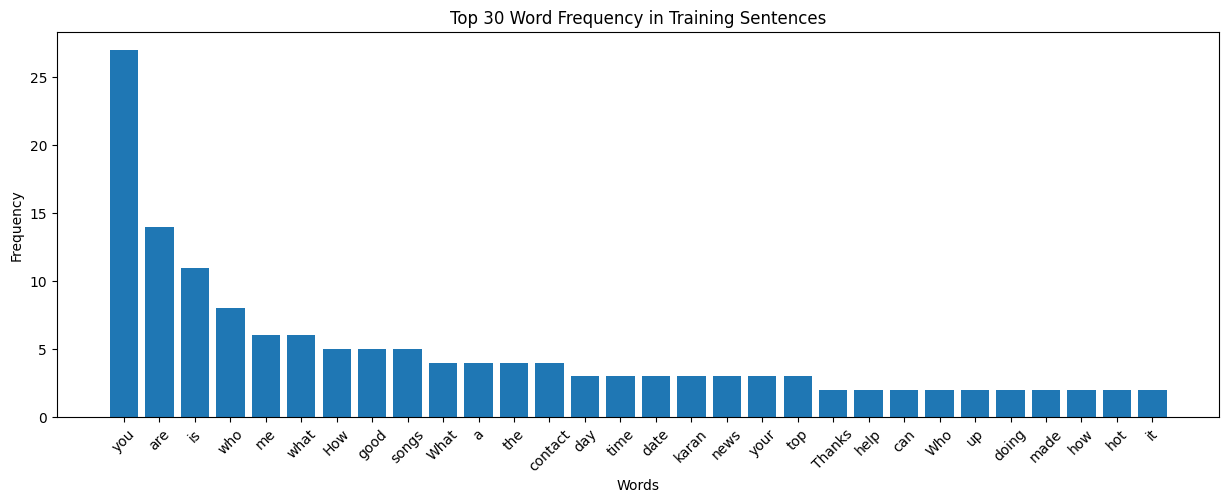

In [10]:

word_freq = dict(Counter([word for sentence in training_sentences for word in sentence.split()]))# Sorting by frequency
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))# Plotting
plt.figure(figsize=(15, 5))
plt.bar(list(sorted_word_freq.keys())[:30], list(sorted_word_freq.values())[:30])
plt.xticks(rotation=45)
plt.title('Top 30 Word Frequency in Training Sentences')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


## Visualizing Class Distribution in Training Data

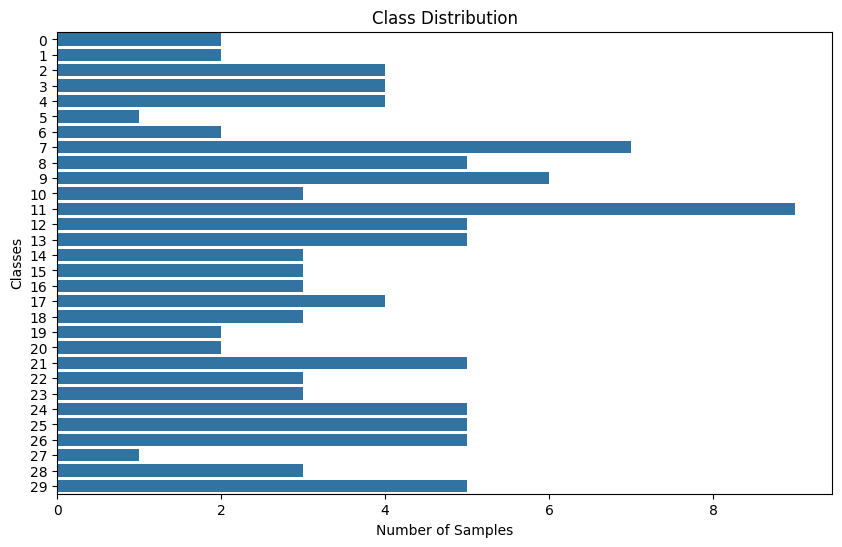

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(y=training_labels)
plt.title('Class Distribution')
plt.xlabel('Number of Samples')
plt.ylabel('Classes')
plt.show()

## Tokenization and Sequence Padding

We start by defining key parameters for our tokenizer:
vocab_size is set to 1000, specifying the maximum number of words to keep based on word frequency. Only the most common 1000 words will be retained.
embedding_dim is defined as 16, which is the size of the vector space in which words will be embedded.
max_len is set to 31, determining the maximum length of all sequences. Any sequence longer than this will be truncated.
oov_token (Out-Of-Vocabulary token) is set to "<OOV>". It is used for words that are not in the word index.
We instantiate a Tokenizer object with these specifications.
The tokenizer is then fitted on training_sentences, which results in each word being assigned a unique integer.
word_index stores the word-to-index mapping generated by the tokenizer.
texts_to_sequences method of the tokenizer is used to convert training_sentences into sequences of integers.
Finally, pad_sequences is applied to ensure that all sequences have the same length, either by truncating them or padding them with zeros at the end (post-padding).

In [12]:
vocab_size = 1000
embedding_dim = 16
max_len = 31
oov_token = "<OOV>"
 
 
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

## Building and Compiling the Neural Network Model

We start by creating a Sequential model from tensorflow.keras. The Sequential model is a linear stack of layers, which is suitable for our feedforward neural network.
We add an Embedding layer as the first layer of our model. This layer will turn positive integers (indexes) into dense vectors of fixed size (embedding_dim). Here, vocab_size is the input dimension, and embedding_dim is the output dimension.
A GlobalAveragePooling1D layer is added next, which will average over the sequence dimension and help reduce the model's complexity.
Following this, we add two Dense layers, each with 16 neurons and 'relu' activation functions. These are fully connected layers that learn non-linear relationships in the data.
The final layer is another Dense layer with num_classes neurons, one for each class, and uses the 'softmax' activation function. This layer will output the probability distribution over the classes.
We compile the model using the 'adam' optimizer and 'sparse_categorical_crossentropy' as the loss function. This setup is typical for multi-class classification tasks. We also include 'accuracy' as a metric for performance evaluation.
Finally, model.summary() is called to print the model's architecture, including the number and shape of the parameters in each layer.

In [13]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))


model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31, 16)            16000     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 31)                527       
                                                                 
Total params: 17071 (66.68 KB)
Trainable params: 17071 (66.68 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

## Training the Neural Network Model

We set the number of training iterations, or epochs, to 500. An epoch is one complete pass through the entire training dataset. Setting a higher number of epochs is intended to allow the model sufficient opportunity to learn and converge to a good set of weights.
The model.fit function is used to start training the model. We feed in our padded_sequences as the input data and np.array(training_labels) as the target data.
The training process will go through the data in batches, adjusting the model weights via backpropagation in an effort to minimize the loss and improve accuracy.
The training process's progress and performance metrics will be displayed for each epoch, allowing us to monitor how well the model is learning.
It's important to note that while a high number of epochs can lead to better learning, it can also result in overfitting, where the model learns patterns specific to the training data but does not generalize well to new, unseen data. Therefore, monitoring the model's performance and adjusting the number of epochs or employing techniques like early stopping are crucial considerations.

In [14]:
epochs = 500
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/500
4/4 [==============================] - 1s 3ms/step - loss: 3.4348 - accuracy: 0.0439
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 3.4328 - accuracy: 0.0439
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 3.4312 - accuracy: 0.0439
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 3.4299 - accuracy: 0.0439
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 3.4284 - accuracy: 0.0439
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 3.4272 - accuracy: 0.0439
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 3.4259 - accuracy: 0.0439
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 3.4245 - accuracy: 0.0439
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 3.4230 - accuracy: 0.0439
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 3.4217 - accuracy: 0.0439
Epoch 11/500
4/4 [===========

## Visualizing Training Performance

Text(0.5, 0, 'Epochs')

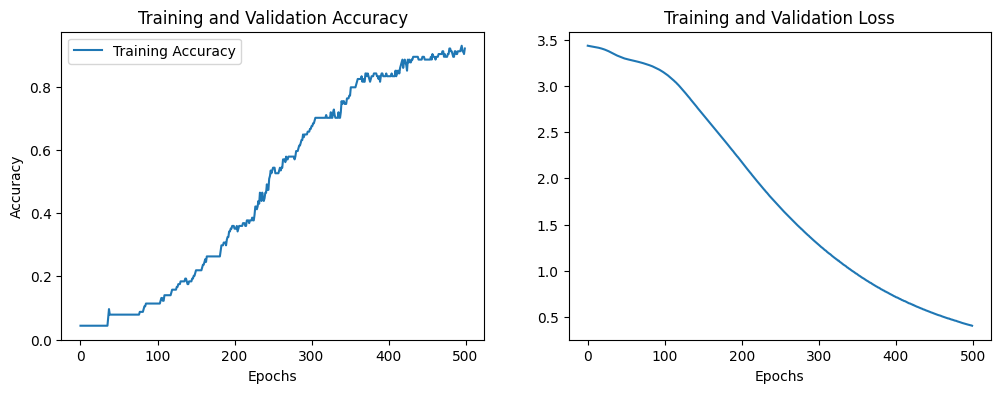

In [15]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')


## Saving the Trained Model and Preprocessing Tools

First, we save the trained neural network model using model.save("chat_model"). This will save the entire model, including its architecture, weights, and training configuration, to a file named "chat_model". This enables us to load the model later without needing to retrain it.
Next, we save the tokenizer, which is crucial for processing new input text in the same way as the training data. We use the pickle library to serialize the tokenizer object to a file named 'tokenizer.pickle'.
Similarly, we also save the label encoder as 'label_encoder.pickle'. The label encoder is essential for converting text labels to numerical format and vice versa, ensuring consistency in how we handle labels during both training and inference.
Saving these components is a key step in deploying the chatbot, as it allows us to use the trained model and preprocessing tools later, for making predictions on new data or further refining the model.

In [16]:
model.save("chat_model")

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
     
# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model/assets


INFO:tensorflow:Assets written to: chat_model/assets


In [17]:
pretrained_model_name = "bert-base-uncased"
tokenizer_pretrained = AutoTokenizer.from_pretrained(pretrained_model_name)
model_pretrained = TFAutoModelForSequenceClassification.from_pretrained(pretrained_model_name, num_labels=num_classes)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Preparing Data, Compiling, and Training the Pre-Trained Model

In [23]:
pretrained_train_encodings = tokenizer_pretrained(training_sentences, truncation=True, padding=True, max_length=max_len)
pretrained_test_encodings = tokenizer_pretrained(test_sentences, truncation=True, padding=True, max_length=max_len)  
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(pretrained_train_encodings),
    training_labels
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(pretrained_test_encodings),
    test_labels 
))
model_pretrained.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_pretrained.fit(train_dataset.shuffle(len(training_sentences)).batch(32), epochs=3, batch_size=32)

Epoch 1/3


4/4 [==============================] - 30s 2s/step - loss: 3.4340 - accuracy: 0.0351
Epoch 2/3
4/4 [==============================] - 8s 2s/step - loss: 3.4340 - accuracy: 0.0088
Epoch 3/3
4/4 [==============================] - 9s 2s/step - loss: 3.4340 - accuracy: 0.0088


## Evaluating the Custom Model and Displaying Its Accuracy

In [19]:
test_labels_encoded = lbl_encoder.transform(test_labels)

test_padded = pad_sequences(tokenizer.texts_to_sequences(test_sentences), truncating='post', maxlen=max_len)

# Pre-trained Model Evaluation
custom_model_accuracy = model.evaluate(test_padded, test_labels_encoded)[1]

# Display the accuracies
print(f"Custom Model Accuracy: {custom_model_accuracy}")

1/1 [==============================] - 0s 164ms/step - loss: 0.4169 - accuracy: 0.8696
Custom Model Accuracy: 0.8695651888847351


## Implementing and Starting the Chatbot Interaction

We initialize colorama to enhance console output with colors, making the chat more user-friendly and visually distinct.
The trained chatbot model, tokenizer, and label encoder are loaded back into the environment. These components are essential for processing user inputs and generating appropriate responses:
The model (chat_model) is loaded to predict the intent of user inputs.
The tokenizer is necessary to convert user input text into a format that the model can understand.
The label encoder is used to decode the predicted intent label back into a readable format.
We define a chat function, chat(), which initiates an interactive loop:
The loop keeps running until the user types "quit".
For each input from the user, the text is processed, passed through the model to predict the intent, and a response is chosen based on the predicted intent.
If a matching response is found for the predicted intent, it is printed out; otherwise, a default response is given, indicating uncertainty.
Finally, the chat function is called, and the user is prompted to start messaging with the bot.

In [20]:

colorama.init()

with open("json.json") as file:  
    data = json.load(file)
def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 31

    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])
        found_response = False

        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))
                found_response = True
                break

        print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))
        if not found_response:
            print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL, "I'm not sure how to respond to that.")
print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!
User: 